Analisis Sentimen Tweet Menggunakan Model LSTM 

In [24]:
# 1. Import Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

In [25]:
import pandas as pd

# Load data
df = pd.read_csv("DATA/TRAINING DATASET/final_preprocessed_dataset_undersampling.csv")

# Bersihkan label dari spasi dan tanda kutip
df['label'] = df['label'].astype(str).str.strip().str.replace("'", "", regex=False)

# Filter hanya label valid
df = df[df['label'].isin(['p', 'n', 'c'])]

# Mapping label
label_map = {'c': 0, 'n': 1, 'p': 2}
df['label'] = df['label'].map(label_map)
y = to_categorical(df['label'])

# Drop teks kosong
df = df.dropna(subset=['full_text_processed'])
df = df[df['full_text_processed'].str.strip() != '']

# Ubah label ke int
df['label'] = df['label'].astype(int)

# Cek hasil
print("Jumlah data setelah cleaning:", len(df))
print("Label unik:", df['label'].unique())
print("Contoh teks:", df['full_text_processed'].head())


Jumlah data setelah cleaning: 1471
Label unik: [1 0 2]
Contoh teks: 0        besides issue genocide drc even years buy one
1    anybody needs chip inserted brain named fafo s...
2    pledged support justice dignity peace gaza joi...
3    taking position gaza taking position gaza one ...
4    children gaza stand proof world looked away do...
Name: full_text_processed, dtype: object


In [26]:
# 4. Tokenisasi & Padding
MAX_VOCAB = 1000
MAX_LEN = 70

tokenizer = Tokenizer(num_words=MAX_VOCAB, oov_token="<OOV>")
tokenizer.fit_on_texts(df['full_text_processed'])

X = tokenizer.texts_to_sequences(df['full_text_processed'])
X = pad_sequences(X, maxlen=MAX_LEN, padding='post')


In [27]:
print("Jumlah data setelah siap:")
print("X:", len(X))
print("y:", len(y))
print("Contoh X:", X[0])
print("Contoh y:", y[0])


Jumlah data setelah siap:
X: 1471
y: 1471
Contoh X: [  1 710   8   1  30  73   1  23   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
Contoh y: [0. 1. 0.]


In [28]:
# 5. Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [29]:
print("Jumlah data:", len(df))
print("Label unik:", df['label'].unique())
print("Contoh teks:", df['full_text_processed'].head())

# df = df.dropna(subset=['label', 'full_text_processed'])
# df = df[df['full_text_processed'].str.strip() != '']


Jumlah data: 1471
Label unik: [1 0 2]
Contoh teks: 0        besides issue genocide drc even years buy one
1    anybody needs chip inserted brain named fafo s...
2    pledged support justice dignity peace gaza joi...
3    taking position gaza taking position gaza one ...
4    children gaza stand proof world looked away do...
Name: full_text_processed, dtype: object


In [30]:
MAX_LEN = 50  
model = Sequential()
model.add(Embedding(input_dim=MAX_VOCAB, output_dim=64, input_length=MAX_LEN))
model.add(LSTM(64, return_sequences=False))
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax'))

model.build(input_shape=(None, MAX_LEN))  # ini biar summary tahu shape-nya

model.summary()


d:\1 KULIAH\TUGAS AKHIR\Skripsi\.venv\Lib\site-packages\keras\src\layers\core\embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)         │ (None, 50, 64)         │        64,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 64)             │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 97,219 (379.76 KB)

 Trainable params: 97,219 (379.76 KB)

 Non-trainable params: 0 (0.00 B)

In [31]:
# 7. Train Model
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)


Epoch 1/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 6s 69ms/step - accuracy: 0.3256 - loss: 1.1016 - val_accuracy: 0.3475 - val_loss: 1.0983
Epoch 2/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - accuracy: 0.3496 - loss: 1.0988 - val_accuracy: 0.3136 - val_loss: 1.0993
Epoch 3/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 59ms/step - accuracy: 0.3364 - loss: 1.0996 - val_accuracy: 0.3475 - val_loss: 1.0984
Epoch 4/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 69ms/step - accuracy: 0.3749 - loss: 1.0990 - val_accuracy: 0.3475 - val_loss: 1.0984
Epoch 5/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - accuracy: 0.3279 - loss: 1.1006 - val_accuracy: 0.3136 - val_loss: 1.1009
Epoch 6/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 68ms/step - accuracy: 0.3348 - loss: 1.0998 - val_accuracy: 0.3475 - val_loss: 1.0991
Epoch 7/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - accuracy: 0.3136 - loss: 1.1011 - val_accuracy: 0.3475 - val_loss: 1.0989
Epoch 8/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - accuracy: 0.3263 - loss: 1.0997 - val_accuracy: 0.3475 - v

In [32]:
# 8. Evaluate
loss, acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {acc:.4f}")


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.3660 - loss: 1.0987
Test Accuracy: 0.3356


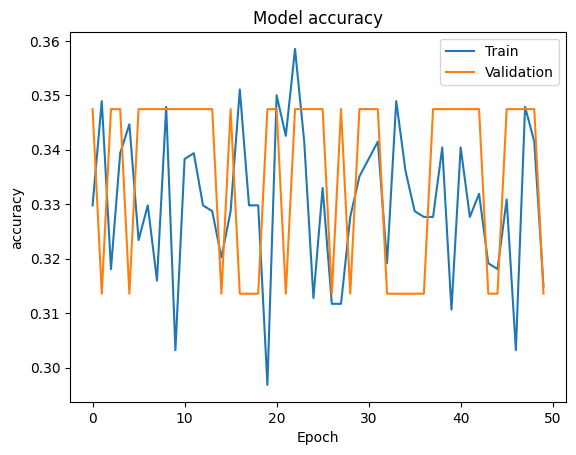

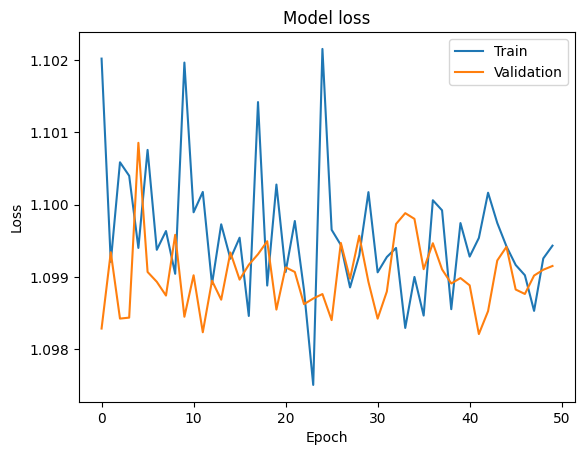

In [33]:
# (Opsional) 9. Plot History
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

# Plotting the training and testing loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()
